## IMPORT
Import of all the basic libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

## INPUT
Take Input Of Data.csv File and convert the candlestick price pattern to average price pattern. Instead of Date in DDMMYYYY format, convert to 1-2231.

In [2]:
train=pd.read_csv("DATA.csv")
train["Median Price"]=np.array((train["Open Price"]+train["Close Price"]+train["High Price"]+train["Low Price"])/4)
A=[]
i=1
while(i<=train.shape[0]):
    A.append(i)
    i+=1
train["Date"]=A
train.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Median Price
0,ITC,EQ,1,155.15,157.65,161.4,154.3,156.20,159.80,158.00,5151158,8.138778e+08,-,2529762,49.11,158.2875
1,ITC,EQ,2,159.80,158.80,172.9,156.0,171.75,170.75,165.27,4334829,7.164385e+08,-,2081578,48.02,164.6125
2,ITC,EQ,3,170.75,175.00,176.0,166.1,169.70,169.80,171.03,6073118,1.038655e+09,-,3414172,56.22,171.7250
3,ITC,EQ,4,169.80,167.80,174.0,163.8,169.10,168.70,169.10,5264029,8.901254e+08,-,2426822,46.10,168.5750
4,ITC,EQ,5,168.70,166.40,175.7,166.4,174.65,174.65,173.51,5083633,8.820781e+08,-,3096943,60.92,170.7875


## PLOTS
Distribution plot of Median Price

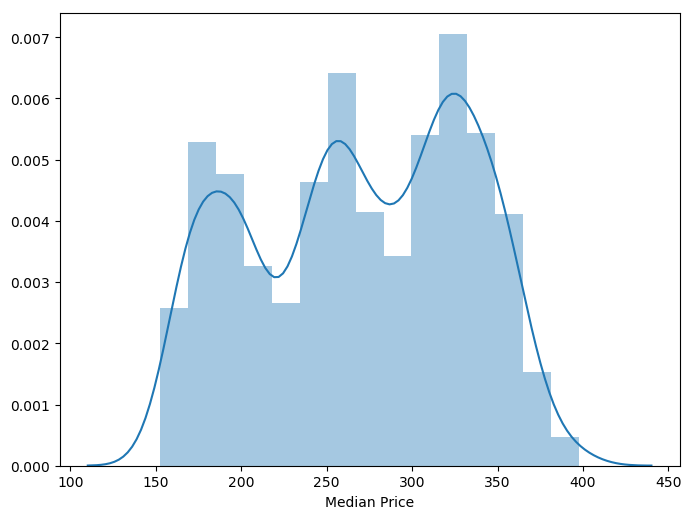

In [3]:
plt.figure(figsize=(8, 6), dpi=100)
sns.distplot(train["Median Price"])
plt.show()

Plot of market average day price against Date.

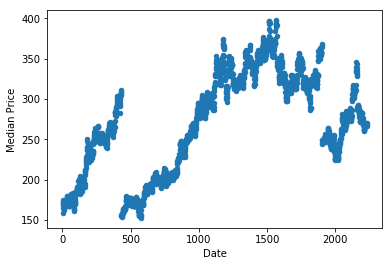

In [4]:
plt.figure(figsize=(8, 6), dpi=100)
data=pd.concat([train["Median Price"],train["Date"]],axis=1)
data.plot.scatter(x='Date',y="Median Price")
plt.show()

Linear Regression Plot of stock market price.

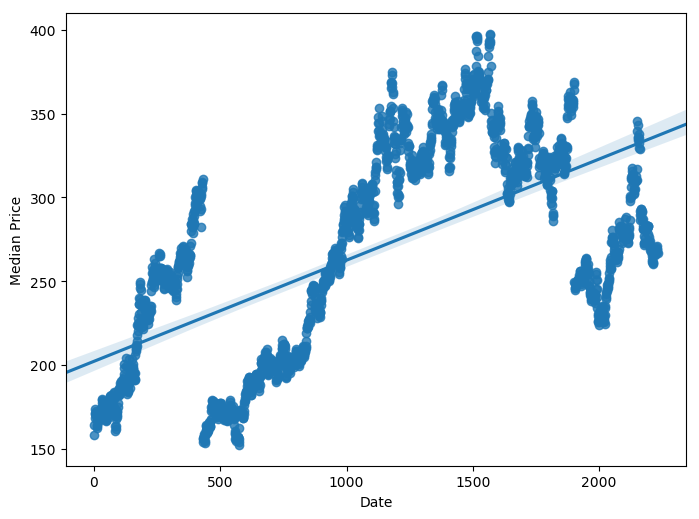

In [5]:
plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(x='Date',y='Median Price',data=data,ci=99.99)
plt.show()

Polynomial Regression plot of 5th Order on the Median Price an Date.

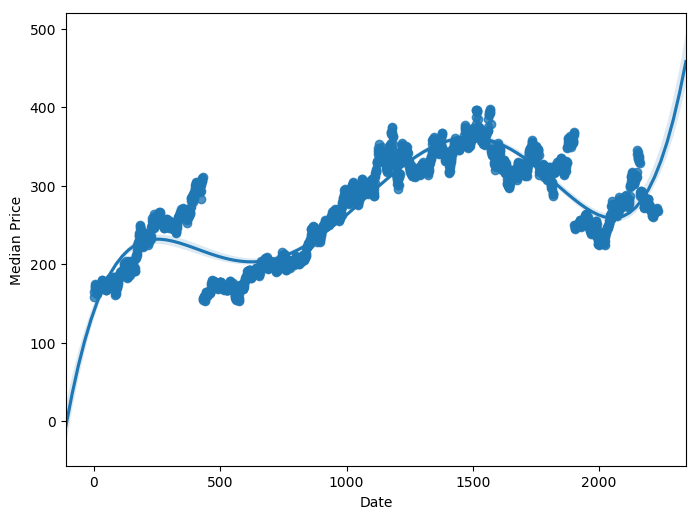

In [6]:
plt.figure(figsize=(8, 6), dpi=100)
sns.regplot(x='Date',y='Median Price',data=data,ci=99.99,order=5)
plt.show()

## RMSE
#### Rmse for Linear Regression

In [7]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
X_train=np.array(train["Date"])
X_train=X_train[:,None]
y_train=np.array(train["Median Price"])
z=np.polyfit(train["Date"], y_train, 1)
p=np.poly1d(z)
linear_values=[]
i=1
while(i<=len(y_train)):
    linear_values.append(p(i))
    i+=1
print('Linear Regression RMSE=',rmse(linear_values,train["Median Price"]))

Linear Regression RMSE= 48.729756007


#### Rmse for Polynomial Regression

In [8]:
z = np.polyfit(train["Date"], y_train, 5)
p=np.poly1d(z)
poly_values=[]
i=1
while(i<=len(y_train)):
    poly_values.append(p(i))
    i+=1
print('Poly Regression RMSE=',rmse(poly_values,train["Median Price"]))

Poly Regression RMSE= 26.9091304277


#### RMSE for XGBOOST

In [9]:
train_data=lgb.Dataset(X_train,label=y_train)
param = {'num_leaves':300, 'objective':'regression','max_depth':12,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'rmse']
num_round=250
lgbm=lgb.train(param,train_data,num_round)
predicted=lgbm.predict(X_train)
print('Boosted Tree RMSE=',rmse(predicted,train["Median Price"]))

Boosted Tree RMSE= 7.08855215314


#### XGBOOST predicted values plot

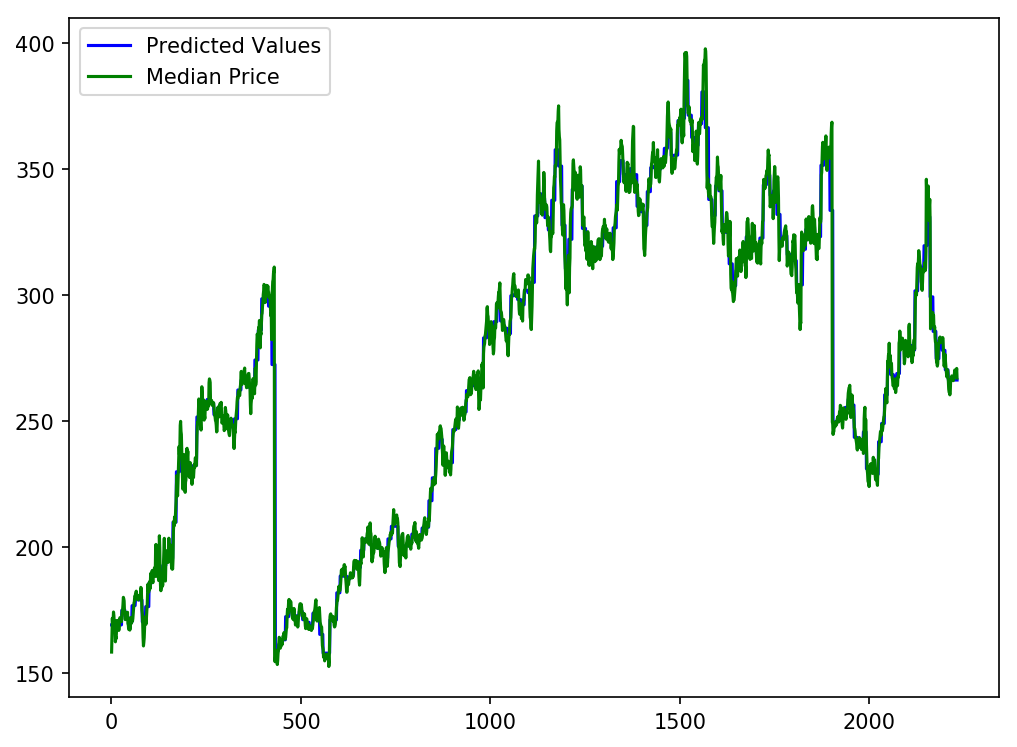

In [10]:
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(train["Date"], predicted, color='blue', linestyle='solid', markerfacecolor='blue', markersize=3)
plt.plot(train["Date"],train["Median Price"],color='green',linestyle='solid',markerfacecolor='green',markersize=3)
plt.legend(['Predicted Values','Median Price'],loc='upper left')
plt.show()